<img src='https://github.com/tessac2/copernicus-training/blob/master/img/logoline_CAMS_flag_text2.png?raw=1' align='center' width='100%'></img>

# CAMS Air Quality Data Access
In this tutorial we will access and view data from the Copernicus Atmosphere Monitoring Service (CAMS). The tutorial includes the following steps:

1. [Prepare environment](#prepare): Prepare your environment including registering with the Atmosphere Data Store (ADS) of CAMS, and obtaining an Application Programming Interface (API) key.

2. [CAMS global atmospheric composition forecasts](#forecast): Download CAMS global atmospheric composition forecasts data for Organic Matter Aerosol Optical Depth from the ADS. View an animation of forecast data for the beginning of August 2021.

3. [CAMS global reanalysis (EAC4) monthly averaged fields](#reanalysis): Download EAC global Carbon Monoxide data for August 2021 at all pressure levels. View animation of CO at different pressure levels.

## <a id='prepare'></a>Prepare environment

Before we begin we must prepare our environment. You will not need to install any software for the training, but if you want to adapt the exercise to your own needs you will need to install the ADS API (`pip install cdsapi`), in addition to Jupyter and Python. You will also need various Python libraries, in particular Xarray http://xarray.pydata.org/en/stable/. Given that most of the Python libraries we will need for this tutorial are included in the Anaconda distribution, if you do wish to set-up your own environment, it is recommended to install Anaconda https://docs.anaconda.com/anaconda/install/.

### Register with ADS

To register with the ADS visit https://ads.atmosphere.copernicus.eu and select **"Login/Register"**

<img src='https://github.com/tessac2/copernicus-training/blob/master/img/ADS_login.png?raw=1' align='left' width='60%'></img>

### Obtain ADS API key

Before you can request data from the ADS, you will need to register on the ADS website and obtain a User ID and API Key. In order to do so, please follow the steps at this link: https://ads.atmosphere.copernicus.eu/api-how-to

Once you have a User ID and API Key for the ADS, insert these into the variables in the cell below. I.e. substitute `ADS_UID` with your ADS User ID and `ADS_API_KEY` with your ADS API key.

In [1]:
ADS_URL = "https://ads.atmosphere.copernicus.eu/api/v2"

# enter your ADS authentication key:
ADS_KEY = "bb0b0079-af18-4520-be33-55533c0deea6:8678970f-a8d1-45e1-81e8-d2c999022694"

### Import libraries

We now need to import the libraries needed for our analyses:

In [8]:
# CDS API
!pip install 'cdsapi>=0.7.2'
!pip install 'cartopy'
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
%matplotlib inline
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Others
from zipfile import ZipFile
from IPython.display import clear_output
from time import sleep

Here we specify a data directory:

In [9]:
DATADIR = './data'

## <a id='forecast'></a>CAMS global atmospheric composition forecasts

### Search for data on the ADS

To search for data, visit the ADS website: https://ads.atmosphere.copernicus.eu To facilitate your search you can use keywords, or apply various filters.

The data we are going to use in this part of the exercise is the CAMS global atmospheric composition forecasts data. Using the filters, or keywords, search for the dataset `CAMS global atmospheric composition forecasts`.

<img src='https://github.com/tessac2/copernicus-training/blob/master/img/ADS_search.png?raw=1' align='left' width='45%'></img> <img src='https://github.com/tessac2/copernicus-training/blob/master/img/ADS_result_forecast.png?raw=1' align='right' width='45%'></img>

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download:

- Variable (Single level): `Organic matter aerosol optical depth at 550nm`
- Date: Start: `2021-08-01`, End: `2021-08-08`
- Time: `00:00` (default)
- Leadtime hour: `0, 6, 12, 18`
- Type: `Forecast` (default)
- Area: Restricted area: `North: 80`, `East: -50`, `South: 25`, `West: -150`
- Format: `Zipped netCDF (experimental)`

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below)...

### Download data using ADS API

Having copied the API request into the cell below, running this will retrieve and download the data you requested into your specified directory.

In [12]:
import cdsapi

dataset = "cams-global-atmospheric-composition-forecasts"
request = {
    "date": ["2024-11-09/2024-11-09"],
    "time": ["00:00"],
    "leadtime_hour": [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
        "10",
        "11",
        "12",
        "13",
        "14",
        "15",
        "16",
        "17",
        "18",
        "19",
        "20",
        "21",
        "22",
        "23",
        "24",
        "25",
        "26",
        "27",
        "28",
        "29",
        "30",
        "31",
        "32",
        "33",
        "34",
        "35",
        "36",
        "37",
        "38",
        "39",
        "40",
        "41",
        "42",
        "43",
        "44",
        "45",
        "46",
        "47",
        "48",
        "49",
        "50",
        "51",
        "52",
        "53",
        "54",
        "55",
        "56",
        "57",
        "58",
        "59",
        "60",
        "61",
        "62",
        "63",
        "64",
        "65",
        "66",
        "67",
        "68",
        "69",
        "70",
        "71",
        "72",
        "73",
        "74",
        "75",
        "76",
        "77",
        "78",
        "79",
        "80",
        "81",
        "82",
        "83",
        "84",
        "85",
        "86",
        "87",
        "88",
        "89",
        "90",
        "91",
        "92",
        "93",
        "94",
        "95",
        "96",
        "97",
        "98",
        "99",
        "100",
        "101",
        "102",
        "103",
        "104",
        "105",
        "106",
        "107",
        "108",
        "109",
        "110",
        "111",
        "112",
        "113",
        "114",
        "115",
        "116",
        "117",
        "118",
        "119",
        "120"
    ],
    "type": ["forecast"],
    "data_format": "netcdf_zip",
    "variable": ["total_aerosol_optical_depth_550nm"],
    "area": [43.7914, -18.16, 27.6363, 4.328]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

Exception: Missing/incomplete configuration file: /root/.cdsapirc

### Read data

Now that we have downloaded the data, we can read, plot and analyse it...

We have requested the data in NetCDF format. This is a commonly used format for gridded (array-based) scientific data.

To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an Xarray **"dataset"**.

First we extract the downloaded zip file:

In [ ]:
# Create a ZipFile Object and load zip file in it
with ZipFile(f'{DATADIR}/20241109.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path=f'{DATADIR}/2021-08_NAmerica_organicMatterAOD/')

For convenience, we create a variable with the name of our downloaded file:

In [ ]:
fn = f'{DATADIR}/20241109/data.nc'

Now we can read the data into an Xarray dataset:

In [ ]:
# Create Xarray Dataset
ds = xr.open_dataset(fn)

Let's see how this looks by querying our newly created Xarray dataset ...

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 138, longitude: 251, time: 32)
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... -50.8 -50.4 -50.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T18:00:00
Data variables:
    omaod550   (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-16 16:14:32 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

We see that the dataset has one variable called **"omaod550"**, which stands for "Organic Matter Aerosol Optical Depth at 550nm", and three coordinates of **longitude**, **latitude** and **time**.

While an Xarray **dataset** may contain multiple variables, an Xarray **data array** holds a single multi-dimensional variable and its coordinates. To make the processing of the **omaod550** data easier, we convert in into an Xarray data array.

In [ ]:
# Create Xarray Data Array
da = ds['omaod550']

In [ ]:
da

<xarray.DataArray 'omaod550' (time: 32, latitude: 138, longitude: 251)>
[1108416 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -150.0 -149.6 -149.2 ... -50.8 -50.4 -50.0
  * latitude   (latitude) float32 79.8 79.4 79.0 78.6 ... 26.2 25.8 25.4 25.0
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-08T18:00:00
Attributes:
    units:      ~
    long_name:  Organic Matter Aerosol Optical Depth at 550nm

To visualise this data we will create an animation, with each frame corresponding to a time step. These include forecasts for each day at lead times of 0, 6, 12 and 18 hours.

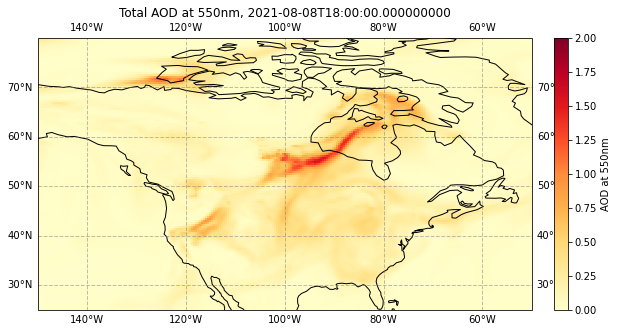

In [ ]:
n = da.time.shape[0] # Number of frames in animation (= number of time-steps)

for i in range(n):
    fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
    ax.set_extent([-150,-50,25,80], crs=ccrs.PlateCarree()) # Specify geographical extent
    ax.coastlines(color='black') # Add coastlines
    ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
    ax.set_title(f'Total AOD at 550nm, {da.time[i].values}', fontsize=12) # Set figure title
    im = plt.pcolormesh(da.longitude, da.latitude, da[i,:,:], cmap='YlOrRd', vmin=0, vmax=2) # Plot the data, iterating over time
    cbar = plt.colorbar(im,fraction=0.046, pad=0.04) # Specify the colourbar
    cbar.set_label('AOD at 550nm') # Define the colourbar label
    plt.show() # Display the figure
    sleep(0.01) # Specify time delay for each iteration (frame) of the animation
    clear_output(wait=True) # Clear the output (figure) before the next iteration (frame) of the animation

The animation clearly shows the high values of organic matter aerosol optical depth originating from the many different wildfires burning across North America in this period. This includes the Dixie fire, which, by August 6, had grown to become the largest single (i.e. non-complex) wildfire in California's history, and the second-largest wildfire overall.

The animation also shows these high values crossing the continent to the east coast where it still affects local air quality.

## <a id='reanalysis'></a>CAMS global reanalysis (EAC4) monthly averaged fields

In this part of the tutorial we will look at another CAMS dataset, the fourth generation ECMWF global reanalysis of atmospheric composition (EAC4). Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using a model of the atmosphere based on the laws of physics and chemistry.

We will use the monthly averaged version of this data to analyse the distribution of Carbon Monoxide globally and at different vertical layers in the atmosphere for August 2020.

This dataset is listed in the ADS as `CAMS global reanalysis (EAC4) monthly averaged fields`. Search for this dataset using the filters, or keywords.

The API request below shows the download parameters that we will select:

In [ ]:
c = cdsapi.Client(url=ADS_URL, key=ADS_KEY)
c.retrieve(
    'cams-global-reanalysis-eac4-monthly',
    {
        'variable': 'carbon_monoxide',
        'pressure_level': [
            '100', '150', '200',
            '250', '300', '400',
            '500', '600', '700',
            '800', '850', '900',
            '925', '950', '1000',
        ],
        'model_level': '60',
        'year': '2020',
        'month': '08',
        'product_type': 'monthly_mean',
        'format': 'netcdf',
    },
    f'{DATADIR}/EAC4_2020-08_CO.zip')

C:\Users\cxcs\Anaconda3\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-09-15 14:47:55,700 INFO Welcome to the CDS
2021-09-15 14:47:55,704 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-global-reanalysis-eac4-monthly
C:\Users\cxcs\Anaconda3\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ads.atmosphere.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
2021-09-15 14:47:55,753 INFO Request is completed
2021-09-15 14:47:55,758 INFO Downloading https://download-0000.copernicus-atmosphere.eu/cache-compute-0000/cache/d

Result(content_length=3710246,content_type=application/zip,location=https://download-0000.copernicus-atmosphere.eu/cache-compute-0000/cache/data7/adaptor.mars.internal-1631631457.4789374-19369-18-45e81635-d460-44f8-82cc-6092e7bdc213.zip)

Extract the file, open it as an Xarray dataset, and inspect the contents:

In [ ]:
with ZipFile(f'{DATADIR}/EAC4_2020-08_CO.zip', 'r') as zipObj:
   zipObj.extractall(path=f'{DATADIR}/EAC4_2020-08_CO/')

In [ ]:
fn = f'{DATADIR}/EAC4_2020-08_CO/levtype_pl.nc'
ds_co = xr.open_dataset(fn)
ds_co

<xarray.Dataset>
Dimensions:    (latitude: 241, level: 15, longitude: 480, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000
  * time       (time) datetime64[ns] 2020-08-01
Data variables:
    co         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-14 14:57:36 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [ ]:
da_co = ds_co['co']
da_co

<xarray.DataArray 'co' (time: 1, level: 15, latitude: 241, longitude: 480)>
[1735200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 100 150 200 250 300 400 ... 850 900 925 950 1000
  * time       (time) datetime64[ns] 2020-08-01
Attributes:
    units:          kg kg**-1
    long_name:      Carbon monoxide
    standard_name:  mass_fraction_of_carbon_monoxide_in_air

### Create meridional mean plot
We will now create a meridional mean plot to visualise the changing concentrations of CO at different longitudes and at various levels of the atmosphere. We will focus on the northern hemisphere and average over the latitudinal axis. In this way we can visualise a two dimensional plot of CO concentrations by longitude and altitude.

To visualise this plot we first need to prepare our data. This includes filtering to keep only data over the northern hemisphere and taking the mean over the latitudinal axis.

In [ ]:
# Filter the data to include only the northern hemisphere
north = da_co.where((da_co.latitude >= 0), drop=True)

# Average (mean) over the latitudinal axis
co = north.mean(dim="latitude")

Now we can plot and visualise our data.

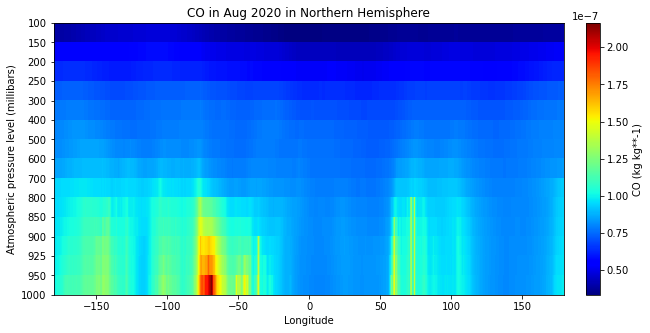

In [ ]:
# The y axis (pressure levels) is a non-linear scale.
# To ensure equal spacing between the values, we create a regular scale.
y = np.arange(co.level.shape[0])+1
y = y[::-1]

# Define the figure and specify size
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1,1,1)

# Set x and y axis tickmarks, labels and figure title
ax.yaxis.set_ticks(y)
ax.yaxis.set_ticklabels(co.level.values)
ax.set_xlabel('Longitude')
ax.set_ylabel('Atmospheric pressure level (millibars)')
ax.set_title('CO in Aug 2020 in Northern Hemisphere', fontsize=12)

# As the presure levels (25) are much less than the longitudes (480),
# we need to ensure the plot fits into the size of the figure.
ax.set_aspect('auto')

# Plot the figure and specify a colourbar
im = plt.pcolormesh(co.longitude-180, y, co[0,:,:], cmap='jet')
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.set_label('CO (kg kg**-1)')

Notice how the concentration and longitudinal distribution of CO varies at different levels of the atmosphere!

### Additional code

In [ ]:
# This code is just to create a colour map similar to that used in CAMS products.

from matplotlib.colors import ListedColormap

matrix = np.array([[256, 256, 256],
                   [210, 214, 234],
                   [167, 174, 214],
                   [135, 145, 190],
                   [162, 167, 144],
                   [189, 188, 101],
                   [215, 209, 57],
                   [242, 230, 11],
                   [243, 197, 10],
                   [245, 164, 8],
                   [247, 131, 6],
                   [248, 98, 5],
                   [250, 65, 3],
                   [252, 32, 1],
                   [254, 0, 0]])
n = 17
cams = np.ones((253, 4))
for i in range(matrix.shape[0]):
    cams[(i*n):((i+1)*n),:] = np.array([matrix[i,0]/256, matrix[i,1]/256, matrix[i,2]/256, 1])
camscmp = ListedColormap(cams)